# **EDA On Environment Temperature Change Across the World.**

**Data description**

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2019. 

**Reference area**: Area of all the Countries and Territories of the world. In 2019: 190 countries and 37 other territorial entities.

**Time coverage**: 1961-2019

**Periodicity: Monthly, Seasonal, Yearly**

**Base period**: 1951-1980

**Unit of Measure**: Celsius degrees °C

**Reference period**: Months, Seasons, Meteorological year

**Source**: http://www.fao.org/faostat/en/#data/ET/metadata

**Import all desired libraries and it will for analysis.**

In [1]:
from adjustText import adjust_text
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

## Downloading the Dataset

**Read a comma-separated values (csv) file into DataFrame.** 
File is encoded with 'latin-1'.

In [39]:
Temp_data = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin-1')
Temp_data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


## Data Preparation and Cleaning

If you observe, in dataframe Y1961,Y1962,Y1963 and so on. I Don't want that 'Y'. So by applying replace function, it will replace values given in to_replace with value.

In [40]:
Temp_data.columns = Temp_data.columns.str.replace('Y', '')
Temp_data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


Either drop the unwanted columns or use df.melt() function. 

It will Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

**Dataframes new long format structure:**

In [4]:
Temp_data=Temp_data.melt(id_vars=['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit'],var_name='Year', value_name='Temperature Change (°c)')

In [5]:
Temp_data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature Change (°c)
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1961,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,1961,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516
...,...,...,...,...,...,...,...,...,...
569699,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,2019,0.247
569700,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,2019,1.233
569701,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,2019,0.378
569702,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,2019,1.297


No need of 'Standard Deviation' element. So, drop it and get dataframe with respect to average temperature change across world.





In [34]:
Temp_data = Temp_data[Temp_data['Element'] =='Temperature change']

In [35]:
Temp_data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature Change (°c)
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777
2,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743
4,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516
6,2,Afghanistan,7004,April,7271,Temperature change,°C,1961,-1.709
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1961,1.412
...,...,...,...,...,...,...,...,...,...
569694,5873,OECD,7016,DecJanFeb,7271,Temperature change,°C,2019,1.527
569696,5873,OECD,7017,MarAprMay,7271,Temperature change,°C,2019,1.352
569698,5873,OECD,7018,JunJulAug,7271,Temperature change,°C,2019,1.078
569700,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,2019,1.233


Use df.fillna() function, to fill the '0' as 'NaN'.

In [36]:
Temp_data.fillna(0)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature Change (°c)
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777
2,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743
4,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516
6,2,Afghanistan,7004,April,7271,Temperature change,°C,1961,-1.709
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1961,1.412
...,...,...,...,...,...,...,...,...,...
569694,5873,OECD,7016,DecJanFeb,7271,Temperature change,°C,2019,1.527
569696,5873,OECD,7017,MarAprMay,7271,Temperature change,°C,2019,1.352
569698,5873,OECD,7018,JunJulAug,7271,Temperature change,°C,2019,1.078
569700,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,2019,1.233


Just observe, What is the behaviour of the data?

In [10]:
Temp_data.columns

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Year', 'Temperature Change (°c)'],
      dtype='object')

Drop unwanted/not useful columns. So, it's data cleaning.

In [11]:
Temp_data1 = Temp_data.drop(['Area Code','Months Code','Element Code','Unit'], axis = 1)
Temp_data1

,Area,Months,Element,Year,Temperature Change (°c)
0,Afghanistan,January,Temperature change,1961,0.777
2,Afghanistan,February,Temperature change,1961,-1.743
4,Afghanistan,March,Temperature change,1961,0.516
6,Afghanistan,April,Temperature change,1961,-1.709
8,Afghanistan,May,Temperature change,1961,1.412
...,...,...,...,...,...
569694,OECD,DecJanFeb,Temperature change,2019,1.527
569696,OECD,MarAprMay,Temperature change,2019,1.352
569698,OECD,JunJulAug,Temperature change,2019,1.078
569700,OECD,SepOctNov,Temperature change,2019,1.233


reset the index by using  df.set_index() function.

In [41]:
Temp_data2 = Temp_data1.set_index('Area')
Temp_data2

,Months,Element,Year,Temperature Change (°c)
Area,,,,
Afghanistan,January,Temperature change,1961,0.777
Afghanistan,February,Temperature change,1961,-1.743
Afghanistan,March,Temperature change,1961,0.516
Afghanistan,April,Temperature change,1961,-1.709
Afghanistan,May,Temperature change,1961,1.412
...,...,...,...,...
OECD,DecJanFeb,Temperature change,2019,1.527
OECD,MarAprMay,Temperature change,2019,1.352
OECD,JunJulAug,Temperature change,2019,1.078


## Exploratory Analysis and Visualization

Dataset is large to handle, so here we can use groupby 'df.groupby()' function, It will help to get various combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups. 

Using df.groupby.mean( ), it compute mean of groups, excluding missing values. and by using can sort the values with respect to descending order.

**got Top 10 countries, where mean temperature change is higher for the period of 1961 to 2019**.

In [42]:
Top_10_avg_temp = Temp_data2.groupby('Area').mean().sort_values('Temperature Change (°c)', ascending=False)[:10]
Top_10_avg_temp

,Temperature Change (°c)
Area,
Serbia,1.518874
Luxembourg,1.492529
Montenegro,1.490134
Estonia,1.460210
Slovenia,1.430326
Belgium,1.427415
Belarus,1.408882
Russian Federation,1.408786
Latvia,1.407250


splitting dataframes for plotting.

In [43]:
Countries = Top_10_avg_temp.index
Countries

Index(['Serbia', 'Luxembourg', 'Montenegro', 'Estonia', 'Slovenia', 'Belgium',
       'Belarus', 'Russian Federation', 'Latvia', 'Lithuania'],
      dtype='object', name='Area')

In [44]:
Temp_change = Top_10_avg_temp['Temperature Change (°c)']
Temp_change

Area
Serbia                1.518874
Luxembourg            1.492529
Montenegro            1.490134
Estonia               1.460210
Slovenia              1.430326
Belgium               1.427415
Belarus               1.408882
Russian Federation    1.408786
Latvia                1.407250
Lithuania             1.363317
Name: Temperature Change (°c), dtype: float64

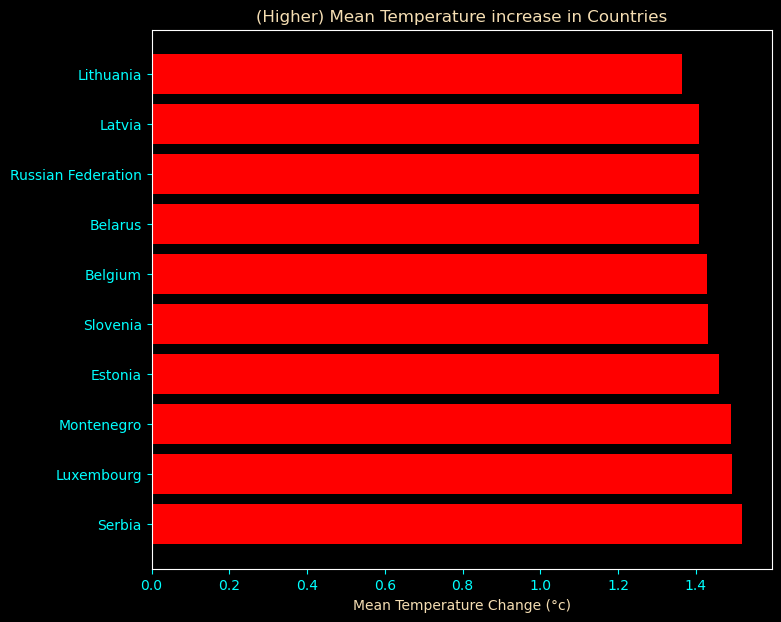

In [52]:
plt.rcdefaults()                                                                             # set default properties for plotting
with plt.style.context('dark_background'):                                                   # for dark background
    fig, ax = plt.subplots(figsize=(8,7))   
    # allow subplots
    ax.barh(Countries,Temp_change , align='center', color = 'Red')                           # Plotting horizontal bar graph
    
    ax.set_xlabel('Mean Temperature Change (°c)',color = 'Wheat' )                           # Set x-axis label
    
    ax.set_title('(Higher) Mean Temperature increase in Countries', color = 'wheat', size = 12)  # set graph title
    
    ax.tick_params(axis="x", colors="cyan")                                                   # Change color of xticks and yticks
    ax.tick_params(axis="y", colors="cyan")
    plt.show();                                                                               # Show

By using similar functions, got Top 10 Countries. In which mean temperature change is lower.

In [18]:
Low_10_avg_temp = Temp_data2.groupby('Area').mean().sort_values('Temperature Change (°c)', ascending=True)[:10]
Low_10_avg_temp

,Temperature Change (°c)
Area,
Nauru,-0.115433
Pitcairn Islands,-0.019167
Midway Island,0.009029
Falkland Islands (Malvinas),0.021628
Yugoslav SFR,0.023896
Pacific Islands Trust Territory,0.030731
Marshall Islands,0.100166
Czechoslovakia,0.138743
Yemen,0.148742


In [19]:
Countries1 = Low_10_avg_temp.index
Temp_change1 = Low_10_avg_temp['Temperature Change (°c)']

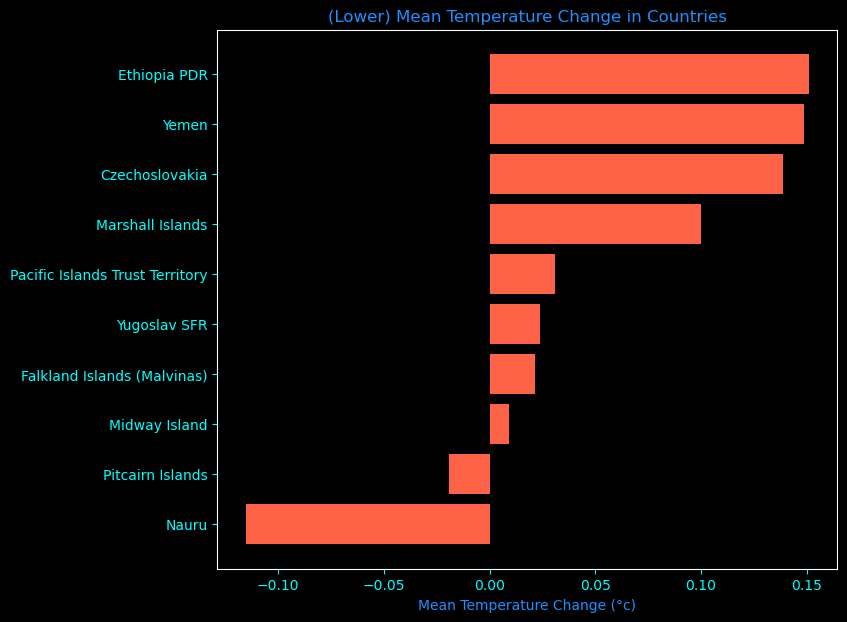

In [54]:
with plt.style.context('dark_background'):                                               # for dark background
    fig, ax = plt.subplots(figsize=(8,7))                                                # set default properties for plotting
    
    ax.barh(Countries1,Temp_change1, align='center', color = 'tomato')                   
    
    ax.set_xlabel('Mean Temperature Change (°c)',color = 'dodgerblue' )                  # Set x-axis label
    
    ax.set_title('(Lower) Mean Temperature Change in Countries', color = 'dodgerblue', size = 12)  # set graph title
    
    ax.tick_params(axis="x", colors="cyan")                                              # Change color of xticks and yticks 
    ax.tick_params(axis="y", colors="cyan")
    
    plt.show();                                                                          # show

#### Check mean temperature change data of Countries (India, China, USA) and their comparison with each other.

Using df.groupby.get_group() function.

In [55]:
India_temp = Temp_data2.groupby(["Area"]).get_group("India")
India_temp

,Months,Element,Year,Temperature Change (°c)
Area,,,,
India,January,Temperature change,1961,0.536
India,February,Temperature change,1961,-1.413
India,March,Temperature change,1961,0.499
India,April,Temperature change,1961,0.026
India,May,Temperature change,1961,-0.144
...,...,...,...,...
India,DecJanFeb,Temperature change,2019,0.274
India,MarAprMay,Temperature change,2019,0.673
India,JunJulAug,Temperature change,2019,1.094


In [56]:
China_temp = Temp_data2.groupby(["Area"]).get_group("China")
China_temp

,Months,Element,Year,Temperature Change (°c)
Area,,,,
China,January,Temperature change,1961,-0.012
China,February,Temperature change,1961,0.353
China,March,Temperature change,1961,0.275
China,April,Temperature change,1961,0.884
China,May,Temperature change,1961,-0.135
...,...,...,...,...
China,DecJanFeb,Temperature change,2019,1.299
China,MarAprMay,Temperature change,2019,1.869
China,JunJulAug,Temperature change,2019,0.948


In [57]:
USA_temp = Temp_data2.groupby(["Area"]).get_group("United States of America")
USA_temp

,Months,Element,Year,Temperature Change (°c)
Area,,,,
United States of America,January,Temperature change,1961,0.943
United States of America,February,Temperature change,1961,1.215
United States of America,March,Temperature change,1961,0.656
United States of America,April,Temperature change,1961,-1.210
United States of America,May,Temperature change,1961,-0.348
...,...,...,...,...
United States of America,DecJanFeb,Temperature change,2019,1.336
United States of America,MarAprMay,Temperature change,2019,1.041
United States of America,JunJulAug,Temperature change,2019,0.913


In [58]:
Uy = USA_temp["Year"]
Ut = USA_temp["Temperature Change (°c)"]

In [25]:
Cy = China_temp["Year"]
Ct = China_temp["Temperature Change (°c)"]

In [26]:
Iy = India_temp['Year']
It = India_temp['Temperature Change (°c)']

**There are various factor affect to increase the earth's surface temperature like emission and trapping of Co2, methane gas and GHG's, heat trapping structures, Infrastructures, Population and Human activity, etc.** 

*  **So let's check the population factor**

**India and China are most populated countries in the world. So, let's check it by compairing dataframes with each other.** 

To check , I am using here simple lineplot. Despite that, we can also use, bar plot, scatter plot with the help of matplotlib  and seaborn modules.

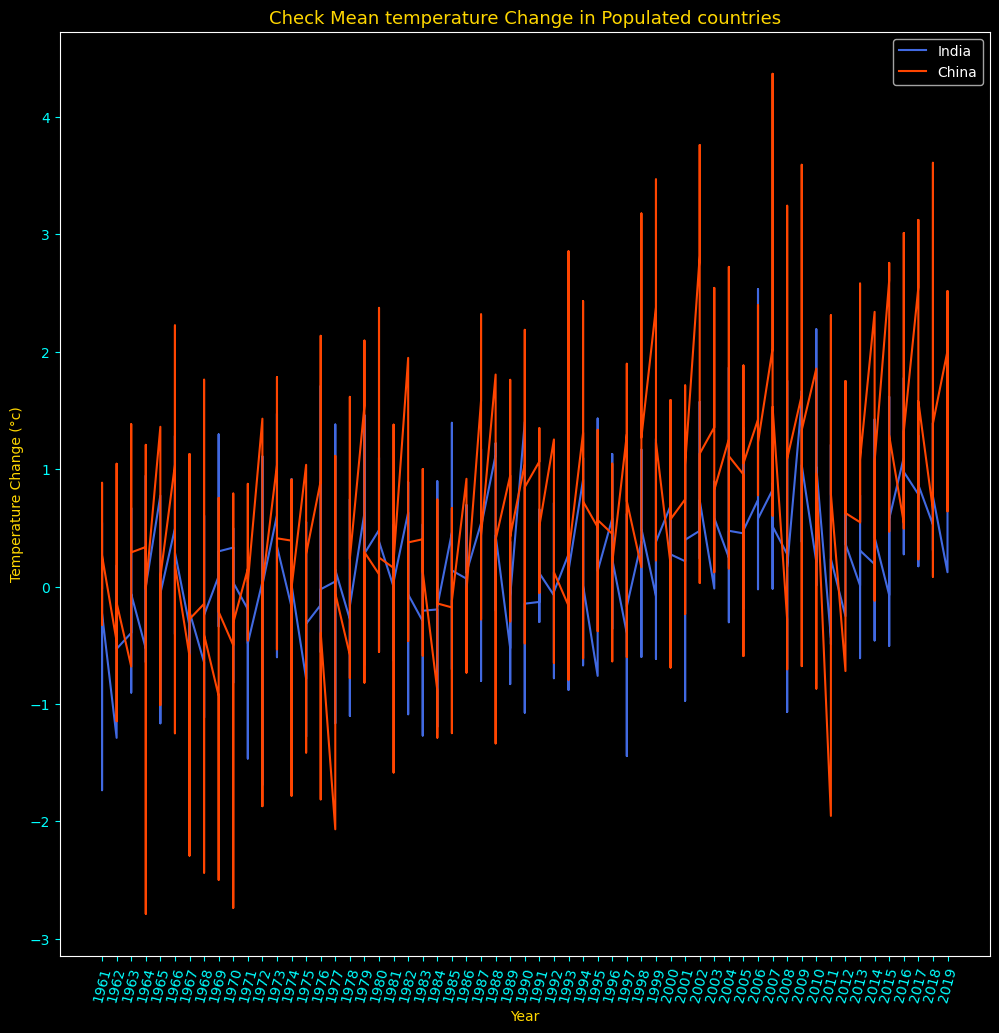

In [59]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(12,12))
    
    India = plt.plot(Iy ,It, color = 'royalblue');
    China = plt.plot(Cy,Ct, color = 'orangered');
    
    plt.xlabel('Year', color = 'gold')
    
    plt.xticks(rotation=75)
    
    plt.ylabel('Temperature Change (°c)',color = 'gold')
    
    plt.legend(['India','China'])
    
    ax.set_title('Check Mean temperature Change in Populated countries', color = 'gold', size = 13)
    
    ax.tick_params(axis="x", colors="cyan")
    ax.tick_params(axis="y", colors="cyan")
    
    plt.show();

The result is China has more mean temperature change as compared to India. The visualization is insufficient to clear the doubt. but population affect the increment of temperature change. we can see it through visualization.
Both India and China are biggest populated countries.

**Note: China is developed country too.**

**Let's check the mean temperature change in democratic countries. India is developing country where USA developed country.**

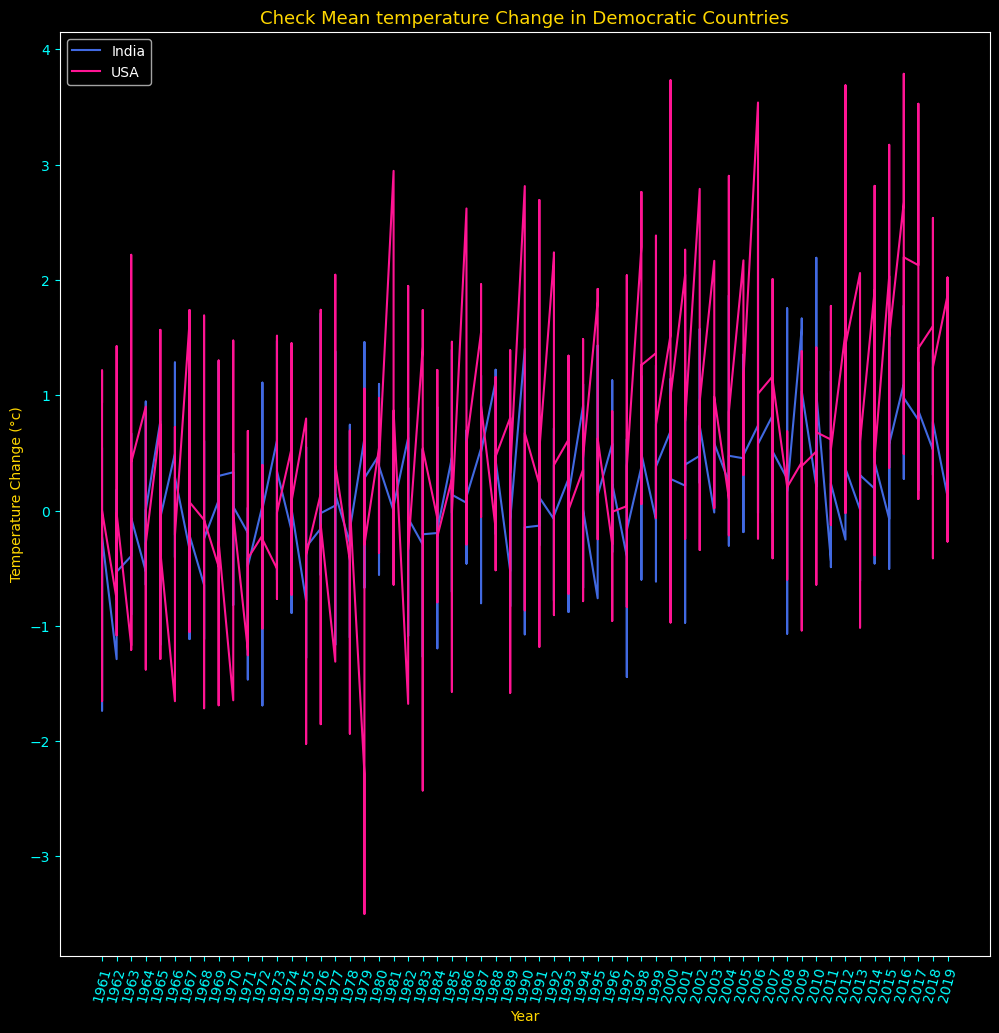

In [62]:
with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(figsize=(12,12))
    India = plt.plot(Iy ,It, color = 'royalblue');
    China = plt.plot(Uy,Ut, color = 'deeppink');
    
    plt.xlabel('Year', color = 'gold')
    
    plt.xticks(rotation=75)
    
    plt.ylabel('Temperature Change (°c)',color = 'gold')
    
    plt.legend(['India','USA'])
    
    ax.set_title('Check Mean temperature Change in Democratic Countries', color = 'gold', size = 13)
    
    ax.tick_params(axis="x", colors="cyan")
    ax.tick_params(axis="y", colors="cyan")
    
    plt.show();

Clearly, see that THe USA has more Mean Temperature Change as compared to India. 

**Let's Check World Vs. India**

In [63]:
World_temp = Temp_data2.groupby(["Area"]).get_group("World")
World_temp

,Months,Element,Year,Temperature Change (°c)
Area,,,,
World,January,Temperature change,1961,0.399
World,February,Temperature change,1961,0.263
World,March,Temperature change,1961,0.254
World,April,Temperature change,1961,0.278
World,May,Temperature change,1961,0.367
...,...,...,...,...
World,DecJanFeb,Temperature change,2019,1.426
World,MarAprMay,Temperature change,2019,1.708
World,JunJulAug,Temperature change,2019,1.308


In [64]:
Wy = World_temp ['Year']
Wt = World_temp['Temperature Change (°c)']

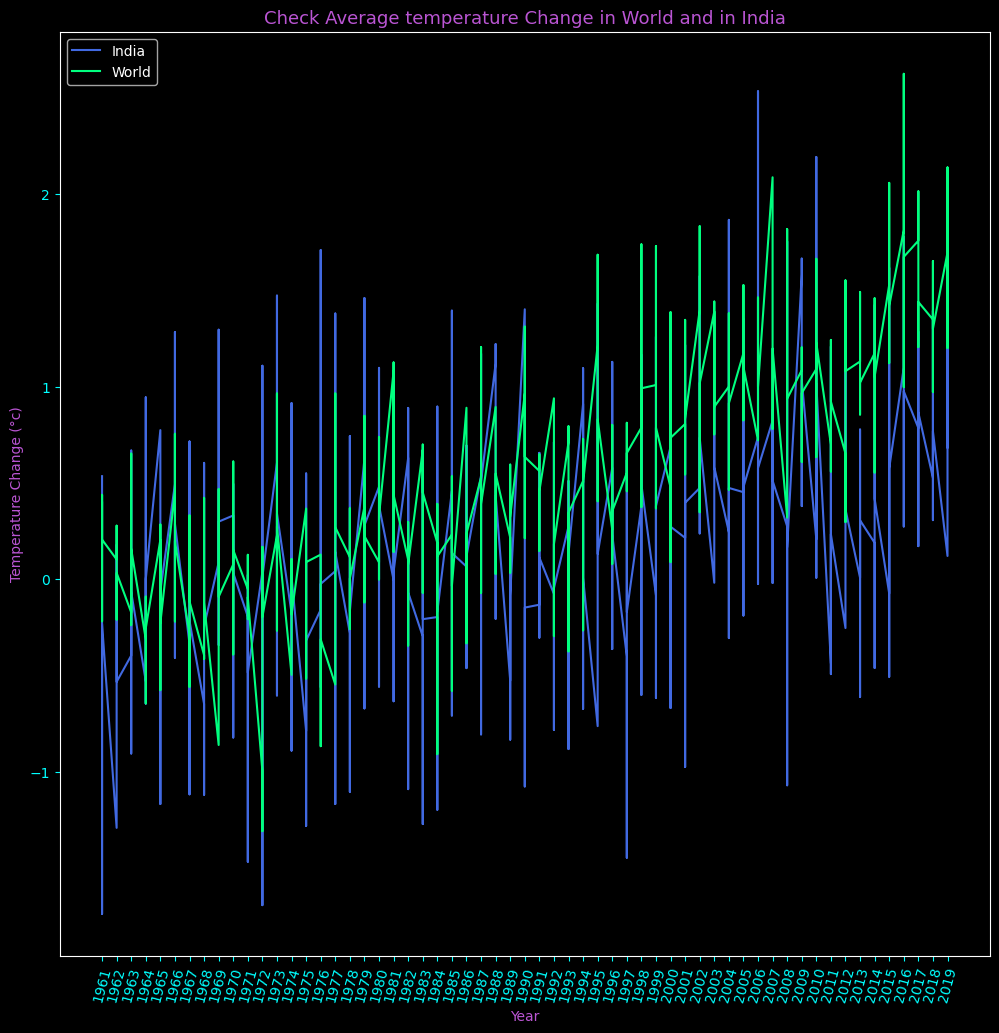

In [31]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(12,12))
    
    India = plt.plot(Iy ,It, color = 'royalblue');
    World = plt.plot(Wy,Wt, color = 'springgreen');
    
    plt.xlabel('Year', color = 'mediumorchid')
    
    plt.xticks(rotation=75)
    
    plt.ylabel('Temperature Change (°c)',color = 'mediumorchid')
    
    plt.legend(['India','World'])
    
    ax.set_title('Check Average temperature Change in World and in India', color = 'mediumorchid', size = 13)
    
    ax.tick_params(axis="x", colors="cyan")
    ax.tick_params(axis="y", colors="cyan")
    
    plt.show();

**So, clearly see that. India need to work more to fall their Mean temperature change. The world has less mean temperature change. Where as India having more.**

# Questions? (Working on)

1) Temperature change according to continents. 

2) Temperature change according to season wise and Meterological year wise.

3) Are developing and developed nation responsible for temperature change?

4) Ground Water drop vs. Temperature Change.